## Question - 1 ##

In [7]:
import numpy as np

S = ['canteen', 'hostel', 'academic building'] 
A = ['attend classes', 'hungry'] 

R = {  
    'canteen': 1,
    'hostel': -1,
    'academic building': 3
}

P = {  
    'hostel': {
        'attend classes': {'canteen': 0, 'hostel': 0.5, 'academic building': 0.5},
        'hungry': {'canteen': 1, 'hostel': 0, 'academic building': 0}
    },
    'academic building': {
        'attend classes': {'canteen': 0.3, 'hostel': 0, 'academic building': 0.7},
        'hungry': {'canteen': 0.8, 'hostel': 0, 'academic building': 0.2}
    },
    'canteen': {
        'attend classes': {'canteen': 0.1, 'hostel': 0.3, 'academic building': 0.6},
        'hungry': {'canteen': 1, 'hostel': 0, 'academic building': 0}
    }
}

gamma = 0.9 
delta = 0.1 

def policy_iteration(S, A, R, P, gamma=0.9, delta=0.1):
    """
    Perform policy iteration to find the optimal policy and value function.
    """
    policy = {s: A[0] for s in S}

    while True:
        old_policy = policy.copy()

        V = evaluate_policy(policy, S, R, P, gamma, delta)

        policy = improve_policy(V, S, A, R, P, gamma)

        if old_policy == policy:
            break

    return policy, V

def evaluate_policy(policy, S, R, P, gamma, delta):
    """
    Evaluate the current policy to compute the value function.
    """
    V = {s: 0 for s in S}

    while True:
        old_V = V.copy()

        for s in S:
            a = policy[s]
            V[s] = R[s] + gamma * sum(P[s][a][s_next] * old_V[s_next] for s_next in S)

        if max(abs(V[s] - old_V[s]) for s in S) < delta:
            break

    return V

def improve_policy(V, S, A, R, P, gamma):
    """
    Improve the policy based on the current value function.
    """
    policy = {}

    for s in S:
        Q = np.zeros(len(A))

        for i, a in enumerate(A):
            Q[i] = R[s] + gamma * sum(P[s][a][s_next] * V[s_next] for s_next in S)

        policy[s] = A[np.argmax(Q)]

    return policy

optimal_policy, optimal_value_function = policy_iteration(S, A, R, P, gamma, delta)

print('Optimal Policy:', optimal_policy)
print('Optimal Value Function:', optimal_value_function)

Optimal Policy: {'canteen': 'attend classes', 'hostel': 'attend classes', 'academic building': 'attend classes'}
Optimal Value Function: {'canteen': 17.96045319629523, 'hostel': 15.189986372635445, 'academic building': 20.980262034084397}


## Question - 2 ##

Optimal Policy (Value Iteration): {(1, 1): 'up', (1, 2): 'up', (1, 3): 'right', (1, 4): 'down', (1, 5): 'down', (1, 6): 'down', (1, 7): 'down', (1, 8): 'down', (1, 9): 'down', (2, 1): 'up', (2, 2): 'up', (2, 3): 'right', (2, 5): 'left', (2, 6): 'down', (2, 7): 'down', (2, 8): 'down', (2, 9): 'down', (3, 1): 'up', (3, 2): 'up', (3, 3): 'up', (3, 5): 'left', (3, 6): 'down', (3, 7): 'down', (3, 8): 'down', (3, 9): 'down', (4, 1): 'left', (4, 5): 'left', (4, 6): 'down', (4, 7): 'down', (4, 8): 'down', (4, 9): 'down', (5, 1): 'left', (5, 2): 'down', (5, 3): 'down', (5, 4): 'down', (5, 5): 'down', (5, 6): 'down', (5, 7): 'down', (5, 8): 'down', (5, 9): 'down', (6, 1): 'left', (6, 2): 'down', (6, 3): 'down', (6, 4): 'down', (6, 5): 'down', (7, 1): 'left', (7, 2): 'down', (7, 3): 'down', (7, 4): 'down', (7, 5): 'down', (7, 7): 'up', (7, 8): 'up', (7, 9): 'right', (8, 1): 'left', (8, 2): 'down', (8, 3): 'down', (8, 4): 'down', (8, 5): 'down', (8, 7): 'up', (8, 8): 'up', (8, 9): 'right', (9, 1):

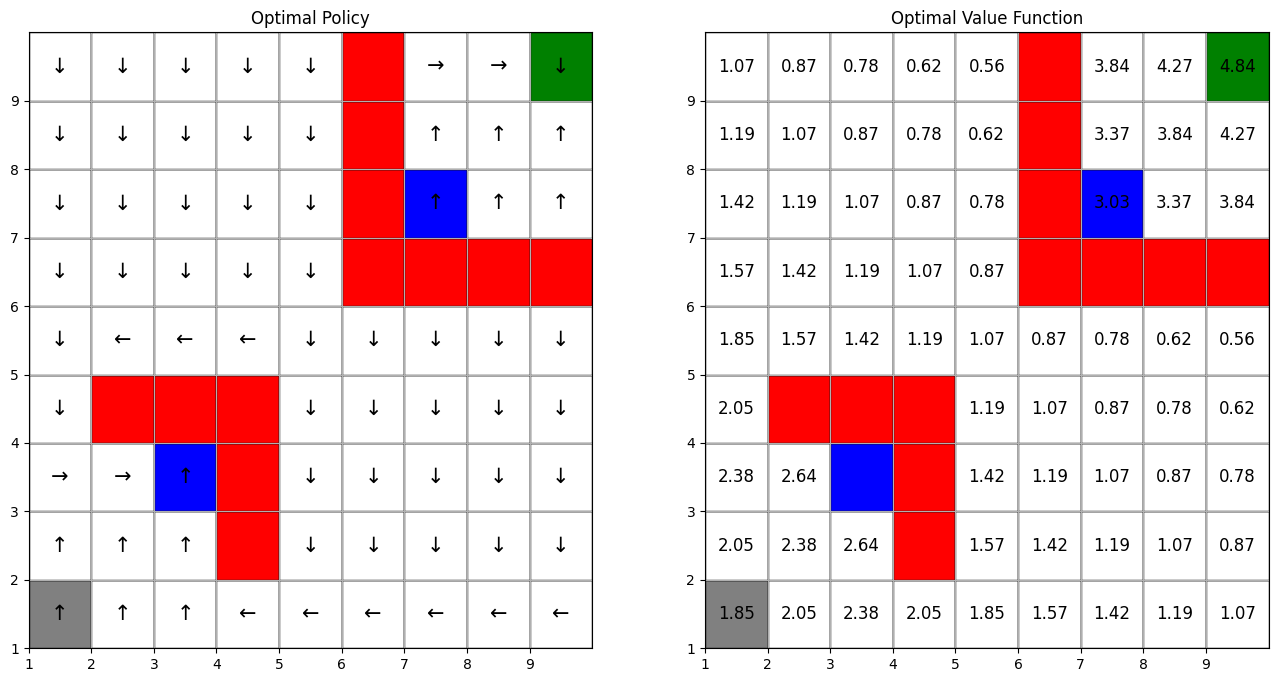

In [5]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 9

S = [(i, j) for i in range(1, grid_size + 1) for j in range(1, grid_size + 1)] #States

walls = [(2, 4), (3, 4), (4, 4), (4, 3), (4, 2), (6, 9), (6, 8), (6, 7), (6, 6), (7, 6), (8, 6), (9, 6)]
S = [s for s in S if s not in walls]

A = ['up', 'down', 'left', 'right'] #Action

R = {s: 0 for s in S} #Reward
R[(9, 9)] = 1

P = {s: {a: {s_next: 0 for s_next in S} for a in A} for s in S} #Probability

for s in S:
    i, j = s
    for a in A:
        if a == 'up':
            s_next = (i, j + 1)
        elif a == 'down':
            s_next = (i, j - 1)
        elif a == 'left':
            s_next = (i - 1, j)
        elif a == 'right':
            s_next = (i + 1, j)
        
        if s_next in S:
            P[s][a][s_next] = 1

P[(3, 3)]['down'][(3, 2)] = 0
P[(3, 3)]['left'][(2, 3)] = 0
P[(2, 3)]['right'][(7, 7)] = 1
P[(3, 2)]['up'][(7, 7)] = 1

def plot_optimal_policy_value_function(optimal_policy, optimal_value_function):
    action_symbols = {
        'up': '↑',
        'down': '↓',
        'left': '←',
        'right': '→'
    }
    
    grid_arrows = np.full((grid_size, grid_size), "", dtype=object)
    grid_values = np.zeros((grid_size, grid_size))

    for (i, j), action in optimal_policy.items():
        grid_arrows[i - 1, j - 1] = action_symbols[action]

    for (i, j), value in optimal_value_function.items():
        grid_values[i - 1, j - 1] = value

    _, axs = plt.subplots(1, 2, figsize=(16, 8))

    for ax, title, grid_content in zip(axs, ["Optimal Policy", "Optimal Value Function"], [grid_arrows, grid_values]):
        ax.set_title(title)
        for i in range(1, grid_size + 1):
            for j in range(1, grid_size + 1):
                facecolor = 'gray' if (i, j) == (1, 1) else \
                            'blue' if (i, j) in [(3, 3), (7, 7)] else \
                            'green' if (i, j) == (9, 9) else \
                            'red' if (i, j) in walls else 'white'
                rect = plt.Rectangle((i - 1, j - 1), 1, 1, edgecolor='black', facecolor=facecolor)
                ax.add_patch(rect)

                content = grid_content[i - 1, j - 1]
                if content:
                    ax.text(i - 0.5, j - 0.5, f"{content:.2f}" if isinstance(content, float) else content,
                            ha='center', va='center', fontsize=15 if ax == axs[0] else 12, color='black')

        ax.set_xlim(0, grid_size)
        ax.set_ylim(0, grid_size)
        ax.set_xticks(np.arange(0, grid_size, 1))
        ax.set_yticks(np.arange(0, grid_size, 1))
        ax.set_xticklabels(np.arange(1, grid_size + 1))
        ax.set_yticklabels(np.arange(1, grid_size + 1))
        ax.grid(True)

    plt.show()

def value_iteration(S, A, R, P, gamma=0.9, delta=0.1):
    V = {s: 0 for s in S}
    policy = {s: A[1] for s in S} 
    while True:
        old_V = V.copy()
        for s in S:
            Q = {a: R[s] + gamma * sum(P[s][a][s_next] * old_V[s_next] for s_next in S) for a in A}
            V[s] = max(Q.values())
            policy[s] = max(Q, key=Q.get)
        if max(abs(V[s] - old_V[s]) for s in S) < delta:
            break
    return policy, V

def policy_iteration(S, A, R, P, gamma=0.9, delta=0.1):
    policy = {s: A[1] for s in S}  
    while True:
        old_policy = policy.copy()
        V = policy_evaluation(policy, S, A, R, P, gamma, delta)
        policy = policy_improvement(V, S, A, R, P, gamma)
        if old_policy == policy:
            break
    return policy, V

def policy_evaluation(policy, S, A, R, P, gamma=0.9, delta=0.1):
    V = {s: 0 for s in S}
    while True:
        old_V = V.copy()
        for s in S:
            a = policy[s]
            V[s] = R[s] + gamma * sum(P[s][a][s_next] * old_V[s_next] for s_next in S)
        if max(abs(V[s] - old_V[s]) for s in S) < delta:
            break
    return V

def policy_improvement(V, S, A, R, P, gamma=0.9):
    policy = {}
    for s in S:
        Q = {a: R[s] + gamma * sum(P[s][a][s_next] * V[s_next] for s_next in S) for a in A}
        policy[s] = max(Q, key=Q.get)
    return policy

optimal_policy_vi, optimal_value_function_vi = value_iteration(S, A, R, P)
print('Optimal Policy (Value Iteration):', optimal_policy_vi)
print('Optimal Value Function (Value Iteration):', optimal_value_function_vi)
plot_optimal_policy_value_function(optimal_policy_vi, optimal_value_function_vi)

Optimal Policy (Policy Iteration): {(1, 1): 'up', (1, 2): 'up', (1, 3): 'right', (1, 4): 'down', (1, 5): 'down', (1, 6): 'down', (1, 7): 'down', (1, 8): 'down', (1, 9): 'down', (2, 1): 'up', (2, 2): 'up', (2, 3): 'right', (2, 5): 'left', (2, 6): 'down', (2, 7): 'down', (2, 8): 'down', (2, 9): 'down', (3, 1): 'up', (3, 2): 'up', (3, 3): 'up', (3, 5): 'left', (3, 6): 'down', (3, 7): 'down', (3, 8): 'down', (3, 9): 'down', (4, 1): 'left', (4, 5): 'left', (4, 6): 'down', (4, 7): 'down', (4, 8): 'down', (4, 9): 'down', (5, 1): 'left', (5, 2): 'down', (5, 3): 'down', (5, 4): 'down', (5, 5): 'down', (5, 6): 'down', (5, 7): 'down', (5, 8): 'down', (5, 9): 'down', (6, 1): 'left', (6, 2): 'down', (6, 3): 'down', (6, 4): 'down', (6, 5): 'down', (7, 1): 'left', (7, 2): 'down', (7, 3): 'down', (7, 4): 'down', (7, 5): 'down', (7, 7): 'up', (7, 8): 'up', (7, 9): 'right', (8, 1): 'left', (8, 2): 'down', (8, 3): 'down', (8, 4): 'down', (8, 5): 'down', (8, 7): 'up', (8, 8): 'up', (8, 9): 'right', (9, 1)

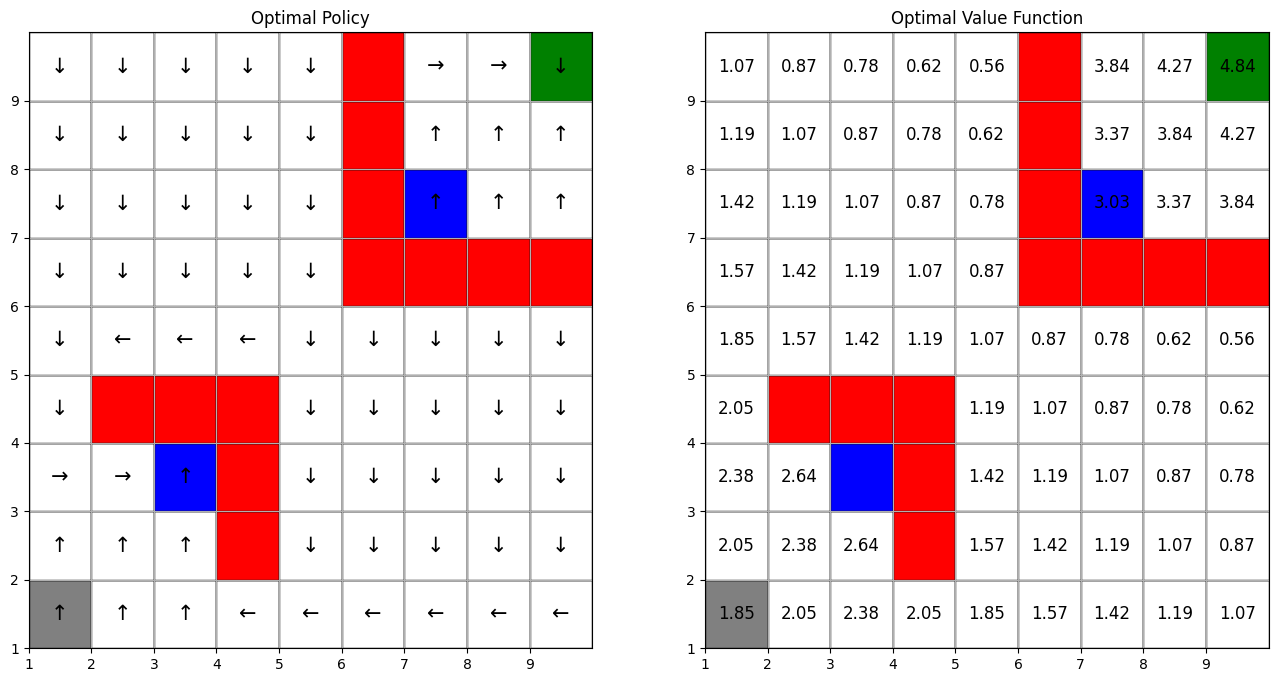

In [6]:
optimal_policy_pi, optimal_value_function_pi = policy_iteration(S, A, R, P)
print('Optimal Policy (Policy Iteration):', optimal_policy_pi)
print('Optimal Value Function (Policy Iteration):', optimal_value_function_pi)
plot_optimal_policy_value_function(optimal_policy_pi, optimal_value_function_pi)